In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('GoodBelly_dataset.csv')

In [3]:
X = data[['Average Retail Price', 'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural', 'Fitness']]
y = data['Units Sold']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     353.7
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:53:39   Log-Likelihood:                -7719.7
No. Observations:                1386   AIC:                         1.546e+04
Df Residuals:                    1377   BIC:                         1.550e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  298.4881 

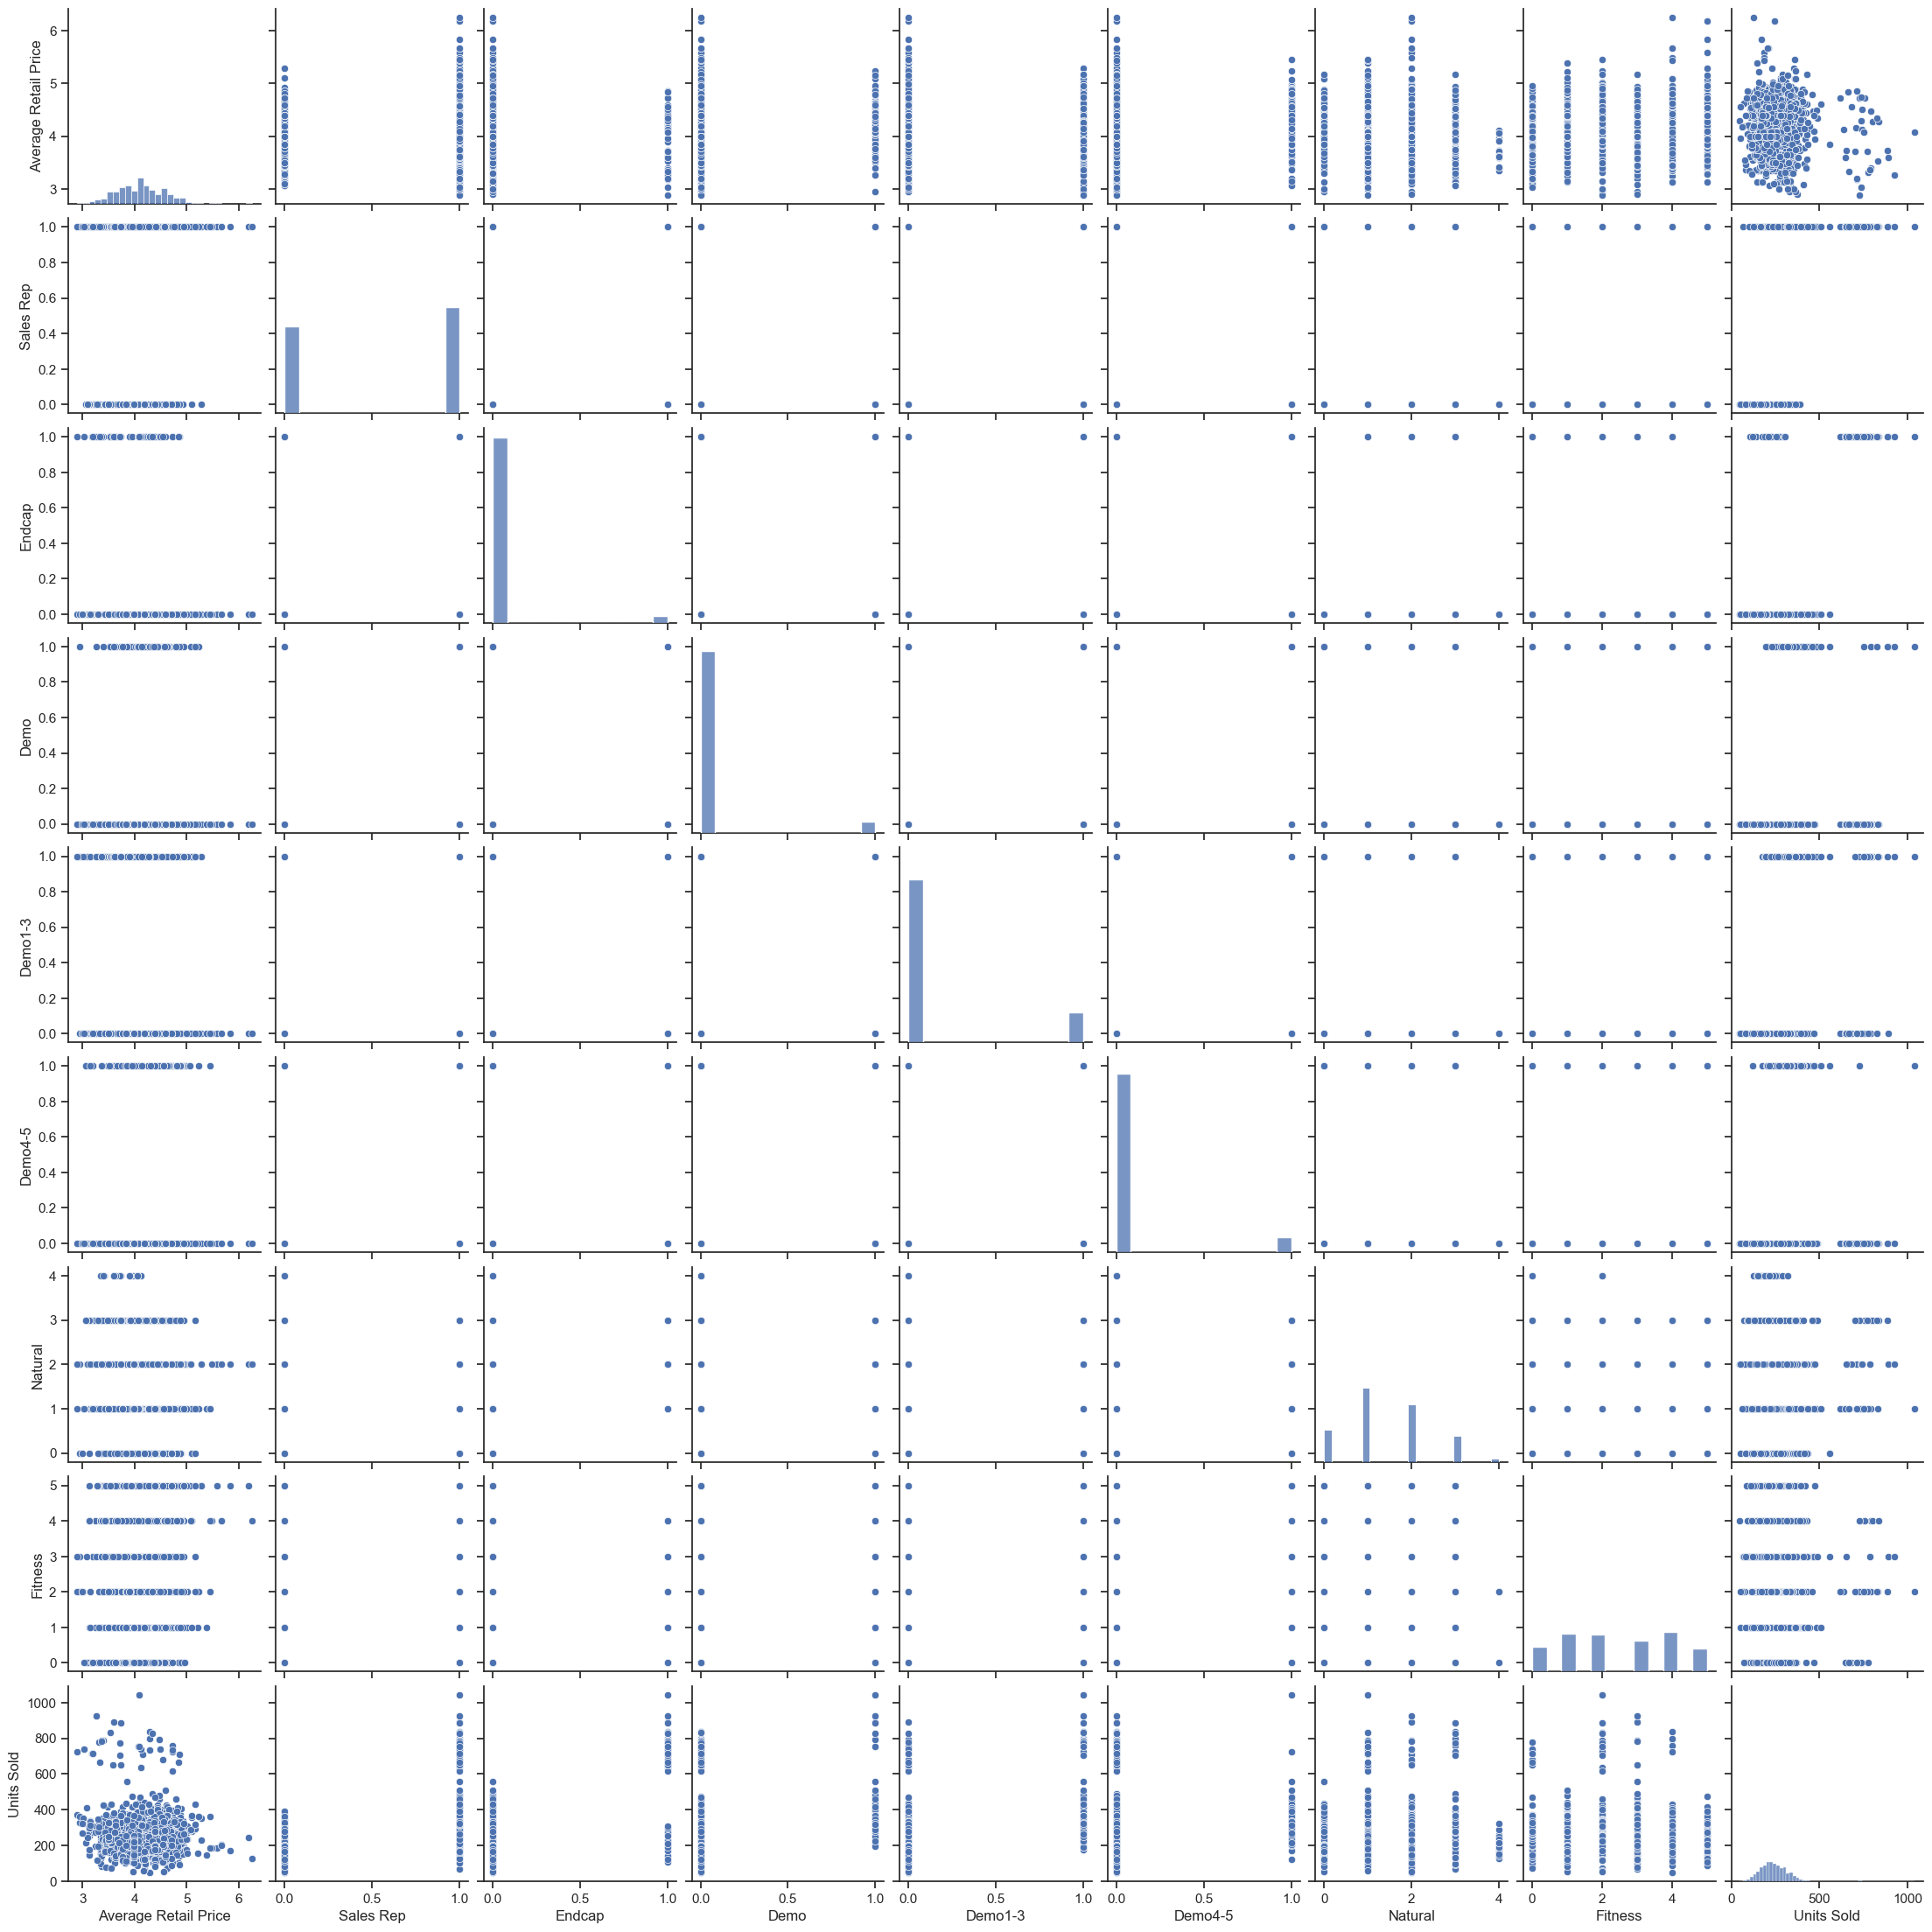

In [4]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, vars=['Average Retail Price', 'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural', 'Fitness', 'Units Sold'])
plt.show()

In [5]:
#The regression analysis reveals that the in-store demo program is a highly effective strategy to boost the sales of GoodBelly's products. The Demo variable's coefficient indicates that a rise in the number of in-store demos results in a substantial increase in the number of units sold, with each additional demo estimated to increase sales by 150.6224 units.
#The statistical significance of the p-value for the coefficient indicates that this relationship is highly likely to be true. Additionally, the coefficients for the Demo1-3 and Demo4-5 variables are also positive and statistically significant,
#indicating that the demo program is effective across different types of demos. Overall, these findings suggest that the in-store demo program is a highly effective promotional strategy for GoodBelly to increase its product sales.

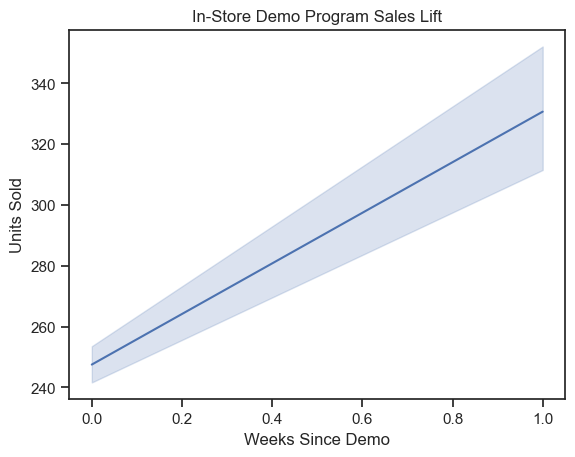

In [6]:
demo_lift =data[['Demo', 'Demo1-3', 'Demo4-5', 'Units Sold']]
sns.lineplot(x='Demo4-5', y='Units Sold', data=demo_lift)
plt.title('In-Store Demo Program Sales Lift')
plt.xlabel('Weeks Since Demo')
plt.ylabel('Units Sold')
plt.show()

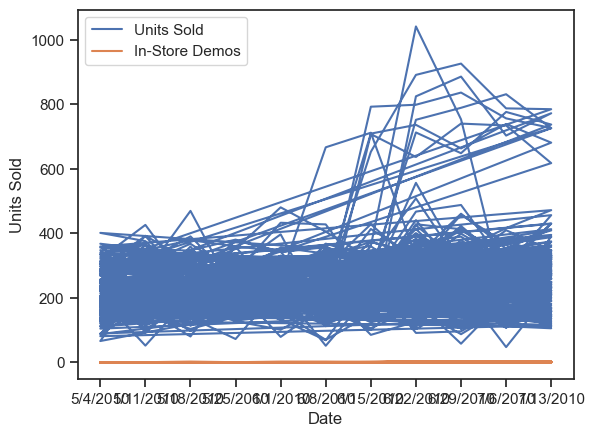

In [8]:
# time series plot
plt.plot(data['Date'], data['Units Sold'], label='Units Sold')
plt.plot(data['Date'], data['Demo'] + data['Demo1-3'] + data['Demo4-5'], label='In-Store Demos')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

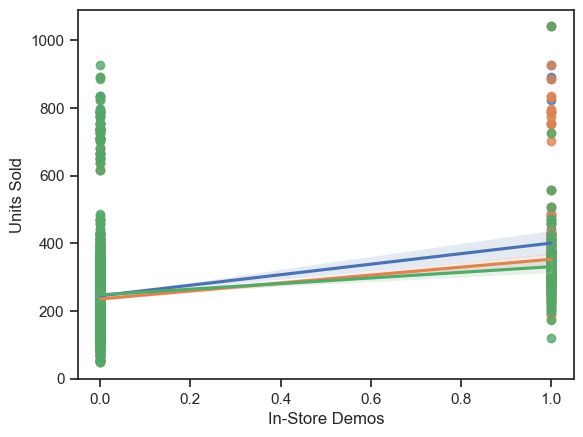

In [9]:
# scatter plot
sns.regplot(x='Demo', y='Units Sold', data=data)
sns.regplot(x='Demo1-3', y='Units Sold', data=data)
sns.regplot(x='Demo4-5', y='Units Sold', data=data)
plt.xlabel('In-Store Demos')
plt.ylabel('Units Sold')
plt.show()

In [11]:
#3

In [10]:
# DefinE independent and dependent variables
X = data['Endcap']
y = data['Units Sold']

# Add intercept column to X
X = sm.add_constant(X)

# Fit linear regression model using ordinary least squares (OLS)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     751.5
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          1.63e-132
Time:                        19:58:23   Log-Likelihood:                -8193.0
No. Observations:                1386   AIC:                         1.639e+04
Df Residuals:                    1384   BIC:                         1.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.6958      2.448     98.308      0.0

In [12]:
#The linear regression analysis highlights the Endcap variable as a significant predictor of the number of GoodBelly products sold.
#Each unit increase in the Endcap variable is associated with a significant increase of 343.2292 units in the number of products sold. 
#The R-squared value of the model is 0.352, meaning that the Endcap variable explains 35.2% of the variation in the number of products sold. 
#These findings indicate that the placement of the product within the store, particularly at the endcap, is a critical factor affecting the sales of GoodBelly's products.
#The regression analysis shows that the products placed at the endcap have higher sales than those placed elsewhere.

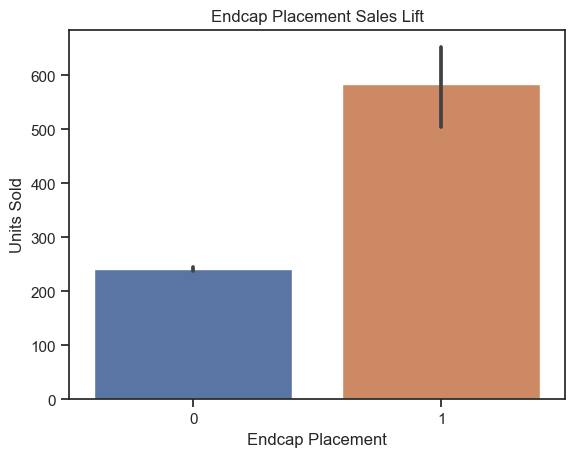

In [13]:
endcap = data[['Endcap', 'Units Sold']]
sns.barplot(x='Endcap', y='Units Sold', data=endcap)
plt.title('Endcap Placement Sales Lift')
plt.xlabel('Endcap Placement')
plt.ylabel('Units Sold')
plt.show()